In [7]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

In [8]:
TRAIN_DIR = 'catdogdata/train'
TEST_DIR = 'catdogdata/test'
IMG_SIZE = 50
LR = 1e-3

In [9]:
def label_img(img):
    word_label = img.split('.')[0]
    
    if word_label == 'dog':
        return [1, 0]
    elif word_label == 'cat':
        return [0, 1]
    
label_img('cat.0.jpg')

[0, 1]

In [16]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        # Read image and turn it into grayscale
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        # Resize images into IMG_SIZE x IMG_SIZE
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
        
    shuffle(training_data)
    np.save('training_data', training_data)
    print('Saved training data')
    return training_data

In [17]:
training_data = create_train_data()

100%|██████████| 25000/25000 [00:32<00:00, 770.41it/s]


Saved training data


In [48]:
training_data

[[array([[176, 196, 253, ...,  64,  64,  63],
         [238, 242, 249, ...,  68,  66,  66],
         [254, 254, 255, ...,  66,  66,  66],
         ..., 
         [197, 195, 222, ..., 176, 174, 176],
         [227, 168, 208, ..., 174, 197, 226],
         [163, 167, 205, ..., 139, 130, 164]], dtype=uint8), array([0, 1])],
 [array([[ 87,  81,  83, ...,  88,  87,  66],
         [119, 100,  78, ...,  90,  88,  60],
         [121,  91,  54, ...,  56,  53,  54],
         ..., 
         [129, 138, 152, ..., 127, 107, 135],
         [147, 139, 124, ..., 132, 120, 130],
         [136, 143, 141, ..., 126, 142, 140]], dtype=uint8), array([1, 0])],
 [array([[ 57,  48,  68, ..., 130, 133, 113],
         [ 45,  46,  52, ..., 123, 151, 120],
         [ 46,  44,  52, ..., 139, 138, 128],
         ..., 
         [160, 161, 166, ..., 130, 175, 166],
         [157, 159, 152, ..., 169, 158, 158],
         [148, 155, 156, ..., 164, 152, 157]], dtype=uint8), array([0, 1])],
 [array([[161, 159, 156, ...,  64,

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

[array([[176, 196, 253, ...,  64,  64,  63],
       [238, 242, 249, ...,  68,  66,  66],
       [254, 254, 255, ...,  66,  66,  66],
       ..., 
       [197, 195, 222, ..., 176, 174, 176],
       [227, 168, 208, ..., 174, 197, 226],
       [163, 167, 205, ..., 139, 130, 164]], dtype=uint8), array([0, 1])]


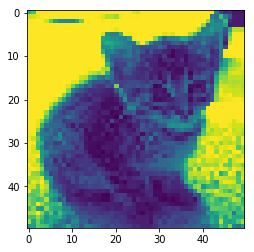

In [25]:
# First element is an image
# Second element is a label
print(training_data[0])
# Checking how an image looks like
plt.imshow(training_data[0][0])

In [26]:
# Build a neural network
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


(50,)

In [40]:
objective = 'binary_crossentropy'
optimizer = RMSprop(lr=1e-4)
model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=(50,50,1), activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
print("First layer...")
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
print("Second layer...")
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
print("Third layer...")
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
print("Compiling model...")
model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

First layer...
Second layer...
Third layer...
Compiling model...
